## Visualizing the Execution Time of Compression Algorithms

**Gregory Way, 2019**

In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggplot2))

Warning message:
“package ‘dplyr’ was built under R version 3.4.4”Warning message:
“package ‘ggplot2’ was built under R version 3.4.4”

In [2]:
time_file <- file.path("results", "time_analysis_results.tsv")
time_results_df <- readr::read_tsv(time_file, col_types=readr::cols()) %>%
    dplyr::mutate(group = paste(algorithm, dataset))

print(dim(time_results_df))
head(time_results_df, 3)

Warning message:
“package ‘bindrcpp’ was built under R version 3.4.4”

[1] 120   5


dataset,k,algorithm,seconds,group
GTEX,200,VAE,1787.447,VAE GTEX
GTEX,80,VAE,1212.493,VAE GTEX
TCGA,200,VAE,1069.017,VAE TCGA


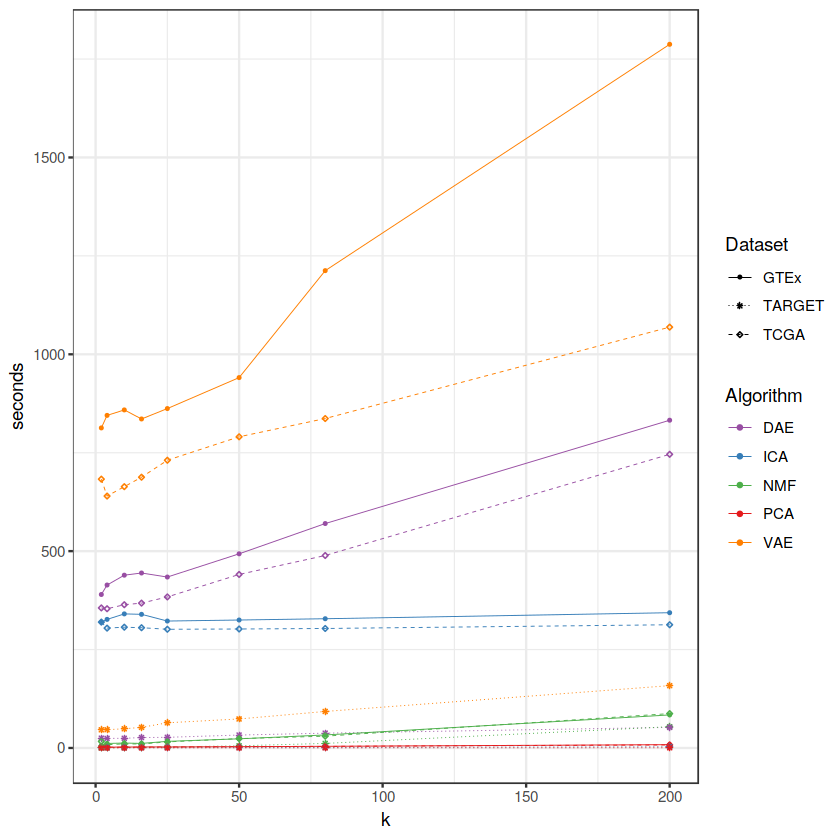

In [3]:
time_gg <- ggplot(time_results_df,
                  aes(x = k,
                      y = seconds,
                      color = algorithm,
                      group = group)) +
    geom_point(aes(shape = dataset),
               size = 0.8) +
    geom_line(aes(linetype = dataset),
              lwd = 0.2) +
    theme_bw() +
    scale_color_manual(name = "Algorithm",
                   values = c("PCA" = "#e41a1c",
                              "ICA" = "#377eb8",
                              "NMF" = "#4daf4a",
                              "DAE" = "#984ea3",
                              "VAE" = "#ff7f00"),
                   labels = c("pca" = "PCA",
                              "ica" = "ICA",
                              "nmf" = "NMF",
                              "dae" = "DAE",
                              "vae" = "VAE")) +
    scale_linetype_manual(name = "Dataset",
                          values = c("GTEX" = "solid",
                                     "TCGA" = "dashed",
                                     "TARGET" = "dotted"),
                          labels = c("GTEX" = "GTEx",
                                     "TCGA" = "TCGA",
                                     "TARGET" = "TARGET")) +
    scale_shape_manual(name = "Dataset",
                       values = c("GTEX" = 16,
                                  "TCGA" = 5,
                                  "TARGET" = 8),
                       labels = c("GTEX" = "GTEx",
                                  "TCGA" = "TCGA",
                                  "TARGET" = "TARGET"))

time_gg

In [4]:
for(extension in c('.png', '.pdf')) {
    fig_file <- paste0("time_execution", extension)
    fig_file <- file.path("figures", fig_file)

    ggsave(plot = time_gg, filename = fig_file, dpi = 300, height = 4, width = 4.5)
}